<a href="https://colab.research.google.com/github/DSNortsev/CSE590-PythonAndDataAnalytics/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install config parser
!pip install configparser 

import configparser
from google.colab import drive

# Make directory in Google Colabs
!mkdir -p /content/.twitter
# Mount Google Drive 
drive.mount('/content/drive')
# Copy twitter keys
!cp "/content/drive/MyDrive/CSE590/private_keys" /content/config
# Read Configuration file
config = configparser.ConfigParser(interpolation=None)
config.read('/content/config')

Mounted at /content/drive


['/content/config']

**1.(Trends, Searches, and Sentiment - 60 pts)**

**a. Use Tweets's Trends API to determine the available trending topics for a city of your choice, and assign a tweet volume of 5000 to any trend with no volume provided.**

In [3]:
import tweepy
# Set up the app key
auth = tweepy.OAuthHandler(config['twitter']['APIK'],
                           config['twitter']['APISK'])
# Set up user token
auth.set_access_token(config['twitter']['ACCTO'],
                      config['twitter']['ACCTOS'])
# 
api = tweepy.API(auth, wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [4]:
def update_missing_tweets_volume(trends):
  """Assign a tweet volume of 5000 to trends with None volume"""
  import copy
  # Make a deep copy of trends
  processed_tweets = copy.deepcopy(trends)
  
  for tweet in processed_tweets:
    if not tweet['tweet_volume']:
      tweet.update({'tweet_volume': 5000})
  return processed_tweets

In [5]:
# Find id in https://www.findmecity.com/
# I have decided to use Dallas as a city of ineterest
dallas_trends = api.trends_place(id=2388929)[0]['trends']
dallas_trends_processed = update_missing_tweets_volume(dallas_trends)

In [6]:
api.rate_limit_status()['resources']['trends']['/trends/place']

{'limit': 75, 'remaining': 74, 'reset': 1618110786}

**b. After sorting the trends in descending order by volume, create a bar graph with each (sorted) trend on the x-axis against its volume on the y-axis.**

In [8]:
from operator import itemgetter
# Sort the trends in descending order
dallas_trends_processed.sort(key=itemgetter('tweet_volume'), reverse=True)
dallas_trends_processed[:5]

[{'name': 'Madrid',
  'promoted_content': None,
  'query': 'Madrid',
  'tweet_volume': 823885,
  'url': 'http://twitter.com/search?q=Madrid'},
 {'name': '#WrestleMania',
  'promoted_content': None,
  'query': '%23WrestleMania',
  'tweet_volume': 430320,
  'url': 'http://twitter.com/search?q=%23WrestleMania'},
 {'name': 'Messi',
  'promoted_content': None,
  'query': 'Messi',
  'tweet_volume': 303199,
  'url': 'http://twitter.com/search?q=Messi'},
 {'name': 'Barcelona',
  'promoted_content': None,
  'query': 'Barcelona',
  'tweet_volume': 303193,
  'url': 'http://twitter.com/search?q=Barcelona'},
 {'name': 'Barca',
  'promoted_content': None,
  'query': 'Barca',
  'tweet_volume': 268113,
  'url': 'http://twitter.com/search?q=Barca'}]

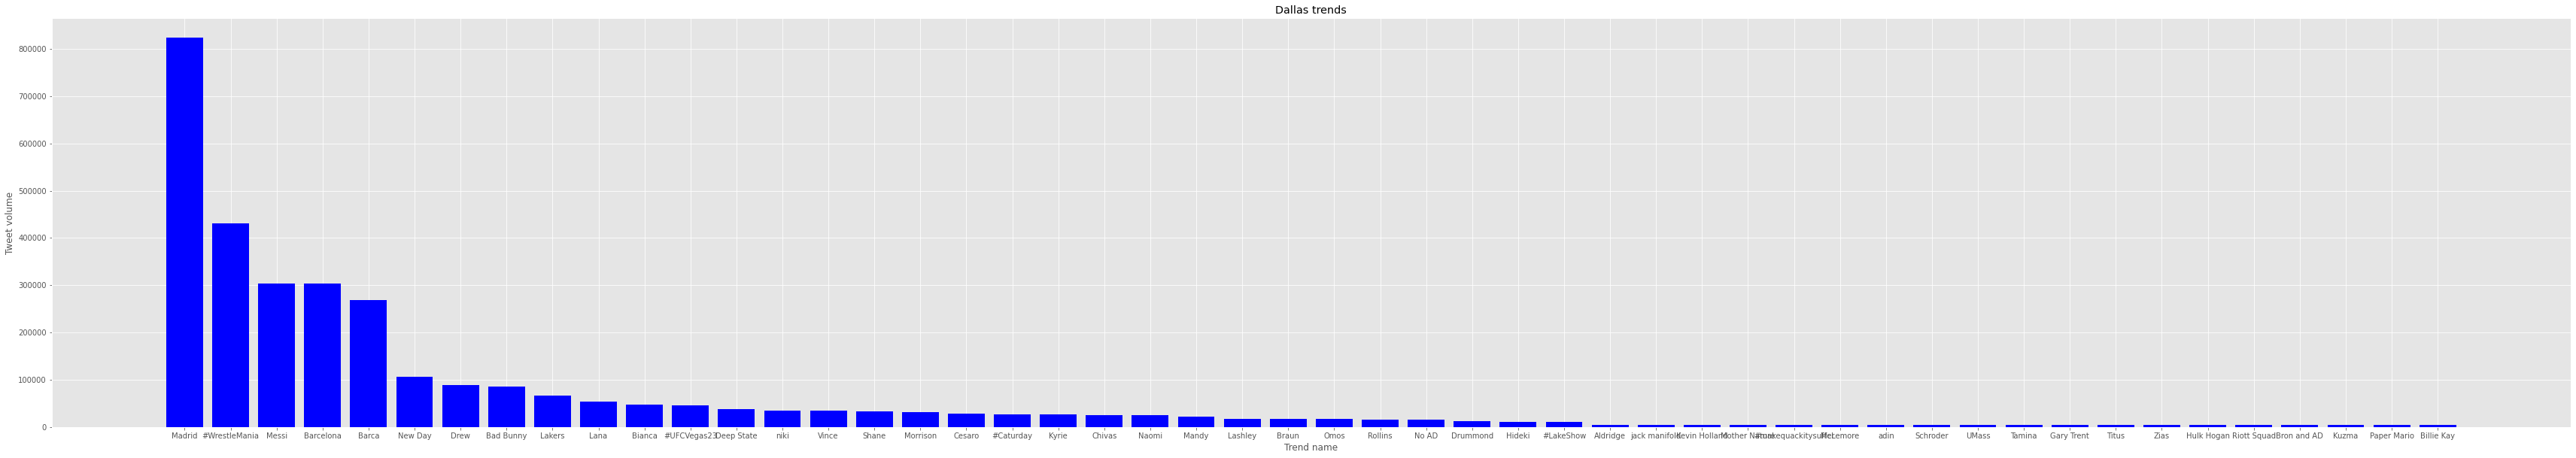

In [9]:
def print_trends(trends):
  """Plot the trends"""
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.figure(figsize=(60,10))
  plt.style.use('ggplot')

  x_val = [trend['name'] for trend in trends]
  y_val = [trend['tweet_volume'] for trend in trends]

  x_pos = [i for i, _ in enumerate(x_val)]

  plt.bar(x_pos, y_val, color='blue')
  plt.title('Dallas trends')
  plt.xlabel('Trend name')
  plt.ylabel('Tweet volume')
  plt.xticks(x_pos, x_val)
  plt.show()

print_trends(dallas_trends_processed)

**c. Use the Twitter Search API to find 100 tweets for each of the three most popular trends in the chosen city, and preprocess their associated tweet text (preferring extended tweet text, if available) in a manner appropriate for tweets.**

In [10]:
api.rate_limit_status()['resources']['search']['/search/tweets']

{'limit': 180, 'remaining': 180, 'reset': 1618110911}

In [12]:
top_trends = [ trend['name'] for trend in dallas_trends_processed][:3]
top_trends

['Madrid', '#WrestleMania', 'Messi']

In [62]:
def retrieve_tweets(trends):
  """Retrieve extended text of top three trends"""
  # Dallas location
  all_tweets = {}  
  # Dallas location
  location = "32.7767,96.7970,600mi"

  for trend in trends:
    # Use filter to not include duplicated tweets (retweets) and only in english
    tweets = api.search(q=trend + " -filter:retweets", geocode=location, tweet_mode='extended', lang='en', count=100)
    all_tweets[trend] = [tweet.full_text for tweet in tweets]
  return all_tweets

In [64]:
tweets = retrieve_tweets(top_trends)

for key, value in tweets.items():
  print(f'{key:<13}: {len(value)}')

Madrid       : 100
#WrestleMania: 100
Messi        : 100


In [69]:
tweets['Messi'][:20]

['@hazardeden10 &amp; #Messi shares equal number of #ElClasico goals since 2018 with @hazardeden10 not playing a single #ElClasico 😆\n\n#ElClasico  #HalaMadrid  #Eibarman',
 'Same age as Messi, you was 18 in 2005 when he scored his first goal for Barca... https://t.co/XXYKQ03gDN https://t.co/hbdmrYb7tZ',
 '@keyse_02 @BHarikrishnan16 @goal Good thing you know messi is carrying Argentina on his own',
 'Losernel Messi slander at an all time high and the stans are rattled to the point of no return, i’ve waited a long time for this capitulation https://t.co/HRon3CUdNN',
 "Clasico hasn't been the same since Ronaldo and Messi left...\n#ElClasico",
 'Neither Messi nor Ronaldo is playing #ElClasico https://t.co/htgolH1txE',
 'This might be the last Clasico for #Messi as well ....',
 '@FCBarcelona   Leo Messi should not be the only one who take free kicks in the team. Clearly, his best days with free kicks are behind him now. Barca is certainly missing few tricks with the set pieces.',
 '@ilyass

**d. Use TextBlob to determine the sentiment for each set of 100 tweets. Do you notice a substantial difference in the proportion of positive and negative sentiment for the three trends? Try to theorize why or why not in a paragraph.**

In [51]:
!pip install tweet-preprocessor
import preprocessor as p

In [ ]:
p.set_options(p.OPT.URL, p.OPT.RESERVED)

In [73]:
def preprocess_tweets(tweets):
  all_trends = {}
  for key, value in tweets.items():
    processed_tweets = []
    for tweet in value:
      processed_tweets.append(p.clean(tweet))
    all_trends[key] = processed_tweets
  return all_trends

In [74]:
normalized_tweets = preprocess_tweets(tweets)
normalized_tweets['Messi'][:20]

['&amp; shares equal number of goals since with not playing a single',
 'Same age as Messi, you was in when he scored his first goal for Barca...',
 'Good thing you know messi is carrying Argentina on his own',
 'Losernel Messi slander at an all time high and the stans are rattled to the point of no return, ive waited a long time for this capitulation',
 "Clasico hasn't been the same since Ronaldo and Messi left...",
 'Neither Messi nor Ronaldo is playing',
 'This might be the last Clasico for as well ....',
 'Leo Messi should not be the only one who take free kicks in the team. Clearly, his best days with free kicks are behind him now. Barca is certainly missing few tricks with the set pieces.',
 'so Vazquez is the leading top goal scorer huh? okay, clearly Vazques is better than Messi.',
 'I have a Barca(messi) jersey and a Juv (Ronaldo) jersey. Am I allowed in this world ? Lol',
 'messi don kill me',
 'Cos he a Goat no9 Well while messi busy collecting golden boots uncle Ben winning

In [107]:
from textblob import TextBlob

def determine_setiment(tweets):
  trends = {}
  trends_sentiments = {}
  for key, value in tweets.items():
    sentiments = []
    trend_sentiments = {'positive': 0, 
                       'neutral': 0,
                       'negative': 0}
    for tweet in value:
      blob = TextBlob(tweet)
      if blob.sentiment.polarity > 0:
        trend_sentiments['positive'] += 1
        sentiment = '+'
      elif blob.sentiment.polarity == 0:
        trend_sentiments['neutral'] += 1
        sentiment = ' '
      else:
        trend_sentiments['negative'] += 1
        sentiment = '-'
      sentiments.append(f'Sentiment {sentiment}: {tweet}')
    trends[key] = sentiments
    trends_sentiments[key] = trend_sentiments
  return trends_sentiments, trends

In [108]:
import json
sentiments = determine_setiment(normalized_tweets)
print(json.dumps(sentiments, indent=4))

{
    "Madrid": {
        "positive": 62,
        "neutral": 21,
        "negative": 17
    },
    "#WrestleMania": {
        "positive": 47,
        "neutral": 39,
        "negative": 14
    },
    "Messi": {
        "positive": 62,
        "neutral": 30,
        "negative": 8
    }
}


In [109]:
print(json.dumps(sentiments[1], indent=4))

{
    "Madrid": [
        "Sentiment +: Hala Madrid Y Nada Mas You Barca people just Barks, We Real People Roars.",
        "Sentiment +: La Liga: Real Madrid beat Barca to move top of table",
        "Sentiment +: Good morning Possession Barca - % Real madrid - %Fouls Barcelona- Real madrid- Real madrid red card",
        "Sentiment +: (La Liga: Real Madrid beat Barcelona to move top of table highlights) has been published on chineselgz -",
        "Sentiment +: (Real Madrid -1 Barcelona: Hosts win El Clasico to move top of La Liga) has been published on The Globe -",
        "Sentiment +: (Real Madrid -1 Barcelona: Hosts win El Clasico to move top of La Liga) has been published on Good News -",
        "Sentiment +: Madrid is too good",
        "Sentiment +: What do you guys have Puig for I dont even see him brining water to players. He has pace creative wtf is wrong with than kid did deserve some playing time for fuckkng sake. May be playing attacking was a mistake if Madrid was hap